# Capstone Project Survey Responses

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Import survey response data
survey = pd.read_csv("/Users/hayleeoyler/Downloads/survey_responses.csv")

In [69]:
# Rename column names
survey = survey.rename(columns={
    'My first choice project is (enter proposal number):': 'first_choice',
    'My second choice project is (enter proposal number):': 'second_choice',
    'My third choice project is (enter proposal number):': 'third_choice',
    'My fourth choice project is (enter proposal number):': 'fourth_choice',
})

In [70]:
project_names = {
    1 :'Energy data interface',
    2:'Decarbonization 2035',
    3:'Seafood emissions',
    4:'School district utilites',
    5:'Justice 40',
    6:'Wildfire',
    7:'Range shifts TNC',
    8:'MPAs',
    9:'Drought resiliency'
}

In [71]:
survey = survey.replace(project_names)

In [73]:
survey.to_csv('survey_named.csv', index=False)

In [63]:
# Create a list of choices to iterate over
column_names = survey.columns[2:6].to_list()

In [64]:

# Change the type of the choice responses to string and take a count of responses
for column in column_names:
    survey[column] = survey[column].astype('Int64')
    # column_count =  survey.groupby(column).size().values
    # survey_counts = pd.DataFrame(columns=['column_count'])

In [43]:
survey.assign(column_count=pd.Series(survey.groupby('first_choice').size().values))
survey.groupby('first_choice').size().values

array([1, 1, 2, 2, 3, 3, 1, 1])

In [65]:
survey.dtypes

Timestamp        object
Name             object
first_choice      Int64
second_choice     Int64
third_choice      Int64
fourth_choice     Int64
dtype: object

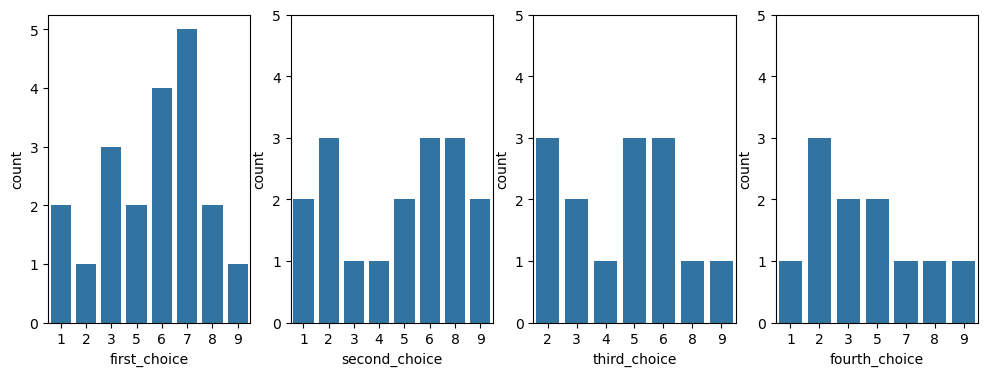

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,4))

# ax = sns.countplot(survey, x='first_choice')

for ax, i in zip(axes, column_names):
    # ax.set_title(i)
    sns.countplot(x=survey[i].dropna(), ax=ax, orient = 'h')
    # survey[i].plot(ax=ax,
                    # kind='barh')
    # ax.set_xlim([0,9])
    # ax.set_xticks(range(0,10))
    ax.set_yticks(range(0,6))
    
# fig.suptitle('Top 3 energy sources for electric power plants in CA', fontsize=14)
plt.show()                     
